In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 

In [0]:
#importing data to the notebook
item_categories = pd.read_csv("item_categories.csv")
items = pd.read_csv("items.csv")
sales_train = pd.read_csv("sales_train.csv")
shops = pd.read_csv("shops.csv")
test_file = pd.read_csv("test.csv")

In [0]:
#merging multiple data files to get a better picture of the whole dataset
sales_train = pd.merge(shops, pd.merge(pd.merge(items, item_categories), sales_train))

In [9]:
#Looking for null values in the dataset
sales_train.isna().sum()

shop_name             0
shop_id               0
item_name             0
item_id               0
item_category_id      0
item_category_name    0
date                  0
date_block_num        0
item_price            0
item_cnt_day          0
dtype: int64

In [0]:
#Adding year and month as a column to perform EDA
sales_train['date']=pd.to_datetime(sales_train['date'])
sales_train["Year"] = pd.DatetimeIndex(sales_train.date).year
sales_train["Month"] = pd.DatetimeIndex(sales_train.date).month

In [0]:
#Sorting the dataset by date, shop and item for each month evry year
sales_train = sales_train.sort_values(["date_block_num","shop_id", "item_id","Year","Month"], ascending = (True, True, True, True, True))

In [12]:
#Removing outliers from the data
sales_train = sales_train[sales_train.item_cnt_day<1000]
sales_train = sales_train[sales_train.item_price<45000]
sales_train

,shop_name,shop_id,item_name,item_id,item_category_id,item_category_name,date,date_block_num,item_price,item_cnt_day,Year,Month
10,"!Якутск Орджоникидзе, 56 фран",0,1+1,32,40,Кино - DVD,2013-01-21,0,221.0,2.0,2013,1
11,"!Якутск Орджоникидзе, 56 фран",0,1+1,32,40,Кино - DVD,2013-01-25,0,221.0,1.0,2013,1
12,"!Якутск Орджоникидзе, 56 фран",0,1+1,32,40,Кино - DVD,2013-01-31,0,221.0,1.0,2013,1
9,"!Якутск Орджоникидзе, 56 фран",0,1+1,32,40,Кино - DVD,2013-03-01,0,221.0,2.0,2013,3
6265,"!Якутск Орджоникидзе, 56 фран",0,1+1 (BD),33,37,Кино - Blu-Ray,2013-01-17,0,347.0,1.0,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2935766,"Ярославль ТЦ ""Альтаир""",59,Элемент питания DURACELL LR06-BC2,22088,83,Элементы питания,2015-03-10,33,119.0,1.0,2015,3
2935767,"Ярославль ТЦ ""Альтаир""",59,Элемент питания DURACELL LR06-BC2,22088,83,Элементы питания,2015-10-27,33,119.0,1.0,2015,10
2935796,"Ярославль ТЦ ""Альтаир""",59,Элемент питания DURACELL TURBO LR 03 2*BL,22091,83,Элементы питания,2015-03-10,33,179.0,1.0,2015,3
2935152,"Ярославль ТЦ ""Альтаир""",59,Энциклопедия Adventure Time,22100,42,"Книги - Артбуки, энциклопедии",2015-10-18,33,629.0,1.0,2015,10


In [0]:
#Aggragting the dataset to count items for a month instead of a day
sales_train = sales_train.groupby([sales_train.date_block_num ,sales_train.Month, sales_train.shop_id, sales_train.item_id]).agg(
    item_cnt_month = pd.NamedAgg('item_cnt_day', sum)
    ).reset_index()

In [14]:
sales_train

,date_block_num,Month,shop_id,item_id,item_cnt_month
0,0,1,0,32,4.0
1,0,1,0,33,2.0
2,0,1,0,35,1.0
3,0,1,0,43,1.0
4,0,1,0,51,2.0
...,...,...,...,...,...
2234392,33,12,59,17775,2.0
2234393,33,12,59,18441,1.0
2234394,33,12,59,19289,1.0
2234395,33,12,59,19688,1.0


In [16]:
#Finding correlation between variables to remove variables that might cause multicollinearity
sales_train.corr()

,date_block_num,Month,shop_id,item_id,item_cnt_month
date_block_num,1.000000,0.118677,0.020037,0.005442,0.006025
Month,0.118677,1.000000,0.014419,0.002269,0.012636
shop_id,0.020037,0.014419,1.000000,0.027530,-0.001531
item_id,0.005442,0.002269,0.027530,1.000000,0.000985
item_cnt_month,0.006025,0.012636,-0.001531,0.000985,1.000000


In [0]:
#Splitting data into training and testing datasets
train, test, train_y, test_y = train_test_split(sales_train.iloc[:, sales_train.columns != 'item_cnt_month'], sales_train["item_cnt_month"], 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=99)

In [0]:
#Multiple Regression Forecast Model
regressor = LinearRegression()
regressor.fit(train,train_y)
y_pred= regressor.predict(test)

In [18]:
#Accuracy Parameter
mean_squared_error(test_y,y_pred)

28.492204510027346

In [19]:
#Scaling Data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)

#Random Forest Regression
regressor = RandomForestRegressor(n_estimators=15, verbose=100, random_state=0)
regressor.fit(train, train_y)
y_pred = regressor.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 15
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.1s remaining:    0.0s
building tree 2 of 15
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.0s remaining:    0.0s
building tree 3 of 15
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.6s remaining:    0.0s
building tree 4 of 15
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.8s remaining:    0.0s
building tree 5 of 15
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   34.3s remaining:    0.0s
building tree 6 of 15
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   41.1s remaining:    0.0s
building tree 7 of 15
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   48.4s remaining:    0.0s
building tree 8 of 15
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   55.2s remaining:    0.0s
building tree 9 of 15
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.0min remaining:    0.0s
b

In [20]:
from sklearn import metrics
import numpy as np
print('Mean Squared Error:', metrics.mean_squared_error(test_y, y_pred))

Mean Squared Error: 23.843864555568825


In [0]:
#Multivariate LSTM Model
train_piv = sales_train.pivot_table(index=['shop_id','item_id'], columns=['date_block_num'], values='item_cnt_month', aggfunc=np.sum, fill_value=0)
train_piv = train_piv.reset_index()

In [0]:
#Merging data (Left join) with the test file in order to keep the shop and item id tuple that is required
train_piv = pd.merge(test_file,train_piv,on = ['item_id','shop_id'],how = 'left')

In [0]:
#Filling the null values with 0 which were introduced due to merging of the datasets
train_piv.fillna(0,inplace = True)
train_piv.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)

In [23]:
train_piv

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#Creating training and testing datasets for the model
X_train = np.expand_dims(train_piv.values[:,:-1],axis = 2)
y_train = train_piv.values[:,-1:]

X_test = np.expand_dims(train_piv.values[:,1:],axis = 2)

#Confirming the required 3D shape for LSTM
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [25]:
#Model generation
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units = 64, activation='relu', input_shape=(33, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics = ['mean_squared_error'])

model.fit(X_train,y_train,batch_size = 4096,epochs = 10)

Using TensorFlow backend.


Epoch 1/10
214200/214200 [==============================] - 56s 263us/step - loss: 8.1951 - mean_squared_error: 8.1951
Epoch 2/10
214200/214200 [==============================] - 55s 258us/step - loss: 6.2386 - mean_squared_error: 6.2386
Epoch 3/10
214200/214200 [==============================] - 55s 257us/step - loss: 5.6662 - mean_squared_error: 5.6662
Epoch 4/10
214200/214200 [==============================] - 55s 255us/step - loss: 4.3894 - mean_squared_error: 4.3894
Epoch 5/10
214200/214200 [==============================] - 55s 255us/step - loss: 3.9555 - mean_squared_error: 3.9555
Epoch 6/10
214200/214200 [==============================] - 58s 269us/step - loss: 5.0164 - mean_squared_error: 5.0164
Epoch 7/10
214200/214200 [==============================] - 55s 259us/step - loss: 4.9107 - mean_squared_error: 4.9107
Epoch 8/10
214200/214200 [==============================] - 55s 255us/step - loss: 5.1168 - mean_squared_error: 5.1168
Epoch 9/10
214200/214200 [======================

In [0]:
#Prediting the test dataset
y_pred = model.predict(X_test)

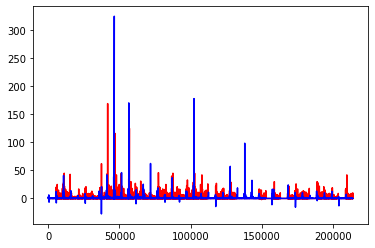

In [27]:
#Plotting the predicted and actual values together to visualise the prediction accuracy
test_y =  train_piv.values[:,:1]
plt.plot(test_y, 'r')
plt.plot(y_pred, 'b')

In [28]:
#Performance Indicator for LSTM
mean_squared_error(test_y,y_pred)

1.9907996703756283